In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxa
sys.path.append('/Users/rdcrlzh1/Documents/insitupy/')

from insitupy.io.readers import CSVReader
from insitupy import from_file
from insitupy.core.profiles import SnowProfile
from insitupy.util.plotting import plot_profile


import logging
# create logger
logging.basicConfig()
loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

In [2]:
profiles = []
for fp in Path('/Users/rdcrlzh1/Documents/insitupy/contrib/hoppinen/data/SNEX20_TS_SP/').glob('SNEX20_TS_SP_20200422_1512_COGMSO_data_*_v02.csv'):
    if 'gap' in fp.stem: continue
    if 'perimeter' in fp.stem: continue
    try:
        profile = from_file(fp)
    except AssertionError:
        continue
    profiles.append(profile)
profile = xr.merge(profiles)
profile = profile.snow.clean_profile()

INFO:insitupy.io.readers:Parsing filepath /Users/rdcrlzh1/Documents/insitupy/contrib/hoppinen/data/SNEX20_TS_SP/SNEX20_TS_SP_20200422_1512_COGMSO_data_temperature_v02.csv
INFO:insitupy.io.readers:Parsing filepath /Users/rdcrlzh1/Documents/insitupy/contrib/hoppinen/data/SNEX20_TS_SP/SNEX20_TS_SP_20200422_1512_COGMSO_data_LWC_v02.csv
INFO:insitupy.io.readers:Parsing filepath /Users/rdcrlzh1/Documents/insitupy/contrib/hoppinen/data/SNEX20_TS_SP/SNEX20_TS_SP_20200422_1512_COGMSO_data_stratigraphy_v02.csv
INFO:insitupy.io.readers:Parsing filepath /Users/rdcrlzh1/Documents/insitupy/contrib/hoppinen/data/SNEX20_TS_SP/SNEX20_TS_SP_20200422_1512_COGMSO_data_density_v02.csv
INFO:insitupy.io.readers:Parsing filepath /Users/rdcrlzh1/Documents/insitupy/contrib/hoppinen/data/SNEX20_TS_SP/SNEX20_TS_SP_20200422_1512_COGMSO_data_siteDetails_v02.csv
INFO:insitupy.core.profiles:Dropping variable density_c.


In [3]:
profile

<xarray.Dataset> Size: 4kB
Dimensions:         (z: 32, x: 1, y: 1, id: 1, time: 1)
Coordinates:
  * z               (z) float64 256B 0.0 10.0 11.0 20.0 ... 115.0 120.0 121.0
  * x               (x) float64 8B -108.1
  * y               (y) float64 8B 39.04
  * id              (id) <U20 80B 'COGMSO_20200422_1512'
  * time            (time) datetime64[ns] 8B 2020-04-22T15:12:00
Data variables: (12/13)
    avg_density     (z) float64 256B nan nan nan nan ... 357.0 nan nan 383.5
    comments        (z) object 256B nan ... 'secondary grain type PPgp (top o...
    density_a       (z) float64 256B nan nan nan nan ... 365.0 nan nan 376.0
    density_b       (z) float64 256B nan nan nan nan ... 349.0 nan nan 391.0
    grain_size      (z) object 256B nan '4-6 mm' nan ... '< 1 mm' nan '< 1 mm'
    grain_type      (z) object 256B nan 'FC' nan nan nan ... nan 'RG' nan 'RG'
    ...              ...
    lwc_vol_a       (z) float64 256B nan nan nan nan 0.0 ... 1.87 nan nan 3.96
    lwc_vol_b       (z) float64 256B nan nan nan nan 0.0 ... 1.49 nan nan 2.63
    manual_wetness  (z) object 256B nan 'M' nan nan nan ... nan nan 'W' nan 'V'
    permittivity_a  (z) float64 256B nan nan 1.321 nan ... 1.917 nan nan 2.374
    permittivity_b  (z) float64 256B nan nan 1.421 nan ... 1.843 nan nan 2.115
    temperature     (z) float64 256B -0.2 -0.2 nan -0.2 ... nan nan -0.1 -0.1
Attributes: (12/16)
    Location:                  Grand Mesa
    Site:                      Skyway Open
    PitID:                     COGMSO_20200422_1512
    Date/Local Standard Time:  2020-04-22 15:12:00
    UTM Zone:                  12N
    Easting:                   754251.0
    ...                        ...
    Pit Comments:              111-101 and 101-91 cm density lots of water pe...
    Parameter Codes:           n/a for this parameter
    x_coord_name:              Longitude
    y_coord_name:              Latitude
    id_coord_name:             PitID
    units:                     {'depth': ['cm'], 'temperature': ['deg C']}

/Users/rdcrlzh1/Documents/insitupy/insitupy/util/plotting.py:246: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/rdcrlzh1/Documents/insitupy/insitupy/util/plotting.py:246: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/rdcrlzh1/Documents/insitupy/insitupy/util/plotting.py:246: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


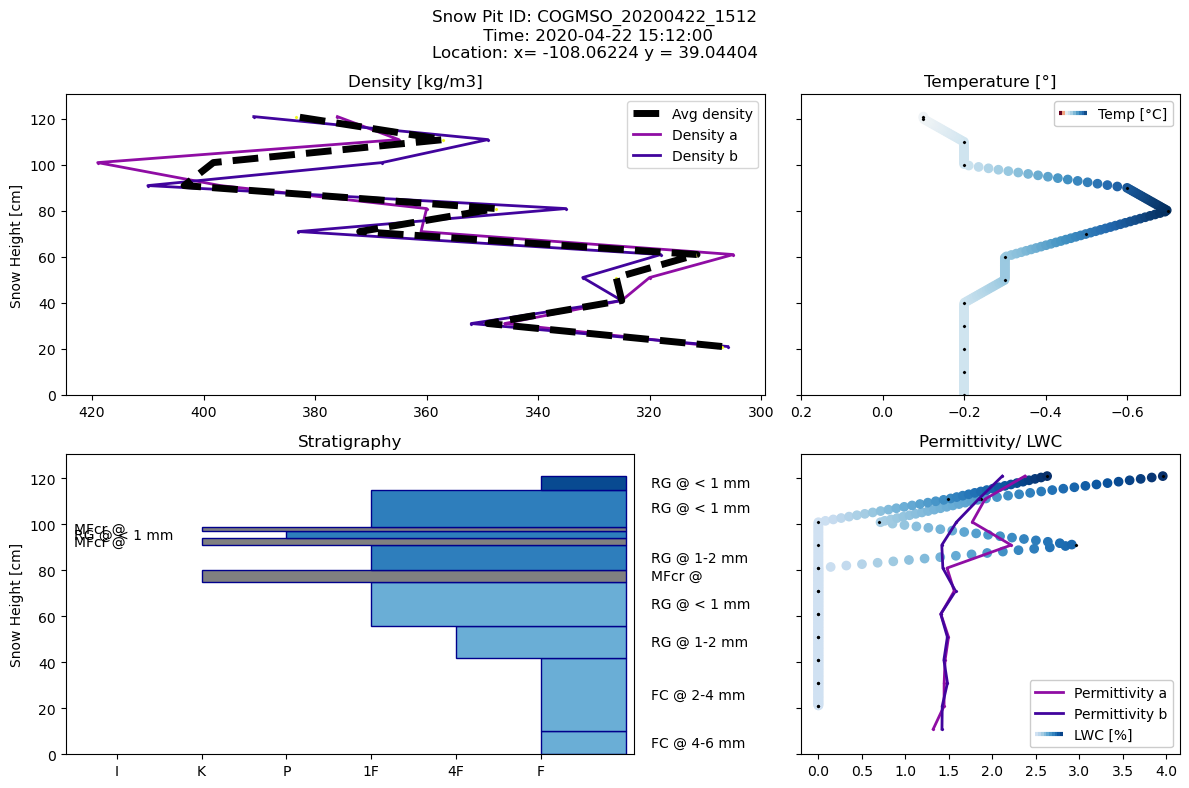

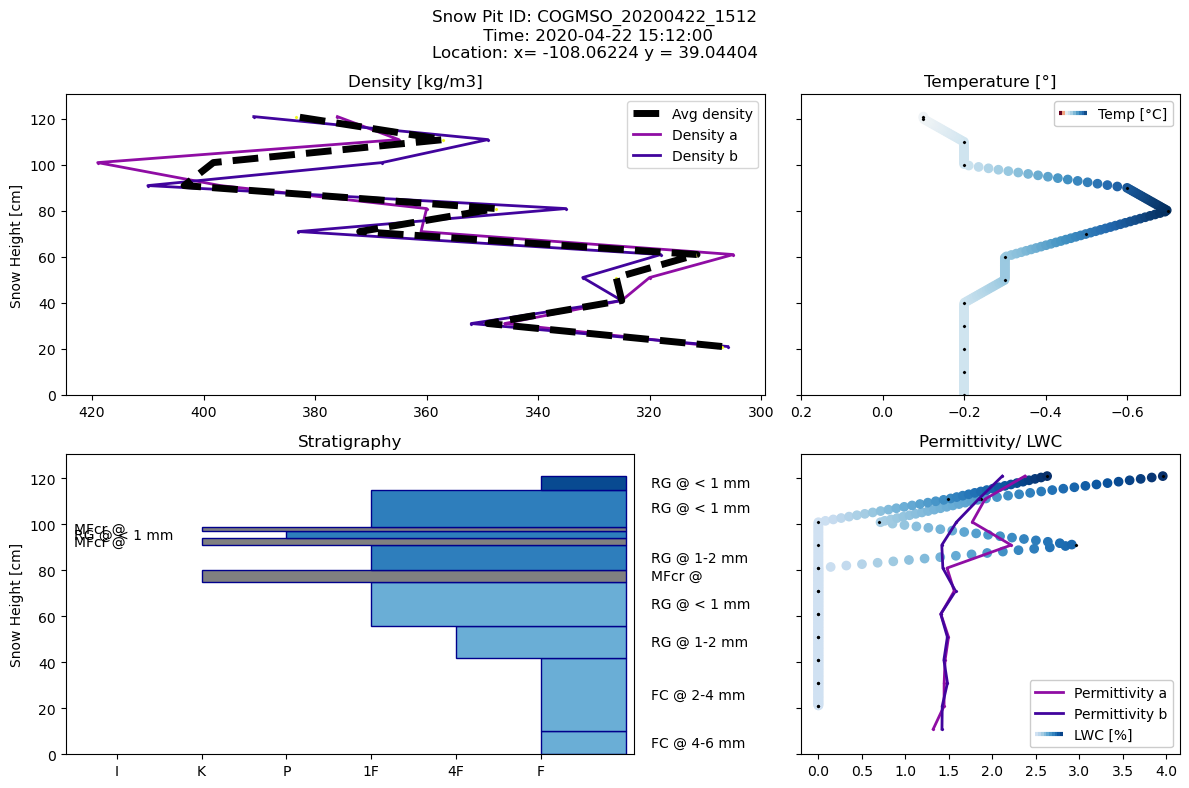

In [4]:
profile.snow.plot_profile()

In [ ]:
#TODO

profile.snow.total_swe

profile.snow.wet_dry

profile.snow.lemons